In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

df = pd.read_csv('/Users/seanyu_mac/Downloads/public_pb_user_auth_info_export_2025-01-31_132640.csv')
df.head(1)

,id,email,sns_type,sns_id,nickname,name,password,birthday,phone,sex,...,ci,is_connect,created_at,updated_at,is_delete,deleted_at,delete_reason,user_id,display_email,settings
0,130549b7-128f-46ee-991f-75b35bebfa55,lover0422@naver.com,kakao,3198349564,배현우,배현우,NaN,19871019,1077714140,남자,...,xHoltYhdt2IwyMl5k2YHxyza2orMmuvQjvoDUxVWzDV4xJ...,False,2024-07-31 15:56:23.226,2024-07-31 15:56:23.226,False,NaN,NaN,44d5e32d-507d-421e-821f-53462d7756b9,NaN,"{""sms"":{""value"":true,""updated_at"":""2024-07-31T..."


In [6]:
df[df['phone'] == 1096280410 ]

,id,email,sns_type,sns_id,nickname,name,password,birthday,phone,sex,...,ci,is_connect,created_at,updated_at,is_delete,deleted_at,delete_reason,user_id,display_email,settings
11119,cf4454b3-9ab5-4c7a-abfe-86a9bc260ef3,ahn6352@naver.com,kakao,3830129934,행복맘,안경옥,NaN,19710610,1096280410,여자,...,tQPQxOZ3FQHPaIrVzbbmPf1AST7JSl/o2mLHlOWvXqJ1Fe...,False,2025-01-26 11:45:28.388,2025-01-26 11:45:28.388,False,NaN,NaN,f098cc21-64bf-4095-8409-830a0db8ac21,ahn6352@naver.com,{}


In [72]:
df = df[['결제 번호', '상품 번호', '주문 번호', '결제 완료일', '주문 상태', '상품명', '옵션명', '수량', '정산가', '수령인명', '수령인 연락처', '구매자명',
       '구매자 ID', '구매자 연락처', '주소']]
df.head(3)

,결제 번호,상품 번호,주문 번호,결제 완료일,주문 상태,상품명,옵션명,수량,정산가,수령인명,수령인 연락처,구매자명,구매자 ID,구매자 연락처,주소
0,parma20250113113433l76B7,50425,50400-50560,2025-01-13 11:34:32.402,반품완료(반품완료),임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,유신홍,sean@pharma-bros.com,1.037057e+09,서울특별시 강남구 논현로94길 30 (역삼동) 2층
1,parma20250113100705mMah9,50425,50399-50559,2025-01-13 10:07:05.088,취소완료,임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,유신홍,sean@pharma-bros.com,1.037057e+09,서울특별시 강남구 논현로94길 30 (역삼동) 2층
2,parma202501131002252PFf1,50425,50398-50558,2025-01-13 10:02:24.435,취소완료,임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,유신홍,sean@pharma-bros.com,1.037057e+09,서울특별시 강남구 논현로94길 30 (역삼동) 2층


In [78]:
df.drop(df[df['수령인 연락처'].isna()].index, inplace=True)
del df['구매자명']
del df['구매자 ID']
del df['구매자 연락처']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 0 to 253
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   결제 번호    253 non-null    object        
 1   상품 번호    253 non-null    int64         
 2   주문 번호    253 non-null    object        
 3   결제 완료일   253 non-null    datetime64[ns]
 4   주문 상태    253 non-null    object        
 5   상품명      253 non-null    object        
 6   옵션명      253 non-null    object        
 7   수량       253 non-null    int64         
 8   정산가      253 non-null    int64         
 9   수령인명     253 non-null    object        
 10  수령인 연락처  253 non-null    object        
 11  주소       253 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 25.7+ KB


In [80]:
pre_col = df.columns.tolist()
post_col = ['order_no', 'product_no', 'order_no', 'order_date', 'status', 'product_name', 'option_name', 'quantity', 'sales', 'recipient_name', 'phone', 'address']
dict_col = dict(zip(pre_col, post_col))
df.rename(columns = dict_col, inplace=True)
df.head(3)

,order_no,product_no,order_no,order_date,status,product_name,option_name,quantity,sales,recipient_name,phone,address
0,parma20250113113433l76B7,50425,50400-50560,2025-01-13 11:34:32.402,반품완료(반품완료),임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,서울특별시 강남구 논현로94길 30 (역삼동) 2층
1,parma20250113100705mMah9,50425,50399-50559,2025-01-13 10:07:05.088,취소완료,임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,서울특별시 강남구 논현로94길 30 (역삼동) 2층
2,parma202501131002252PFf1,50425,50398-50558,2025-01-13 10:02:24.435,취소완료,임직원용 PB 상품 구매 페이지,마그듀오,1,6300,유신홍,010-3705-7325,서울특별시 강남구 논현로94길 30 (역삼동) 2층


In [42]:
# 결제번호에 따른 평균 결제 금액
# 주문번호에 따른 평균 결제 금액 != 결제번호에 따른 평균 결제 금액과 다른가 체크
# 주문상태에 따른 취소율, 판매자취소율, 반품률
# 상품명에 따른 기간별 판매 금액, 평균 판매 금액
# 옵션명에 따른 기간별 판매 금액, 평균 판매 금액
# 평균 구매 수량
# 수령인명에 따른 개인별 구매 금액 랭킹, 횟수 랭킹
# 주소에 따른 지역별 구매 금액 랭킹, 횟수 랭킹

In [102]:
con1 = df['status'] == '배송완료'
con2 = df['status'] == '구매확정'
sales_df = df[con1 | con2]
sales_df.reset_index(inplace=True)
sales_df.head(3)

,index,order_no,product_no,order_no,order_date,status,product_name,option_name,quantity,sales,recipient_name,phone,address
0,6,parma202501091559546twy4,50425,50387-50547,2025-01-09 15:59:53.339,배송완료,임직원용 PB 상품 구매 페이지,프로바이오 에스엘비(SLB),1,17400,박지영,010-5091-0108,"경기도 안양시 만안구 안양천서로 249 (안양동, 안양역푸르지오더샵아파트) 111동..."
1,11,parma2025010521044494Ez1,50425,50379-50539,2025-01-05 21:04:43.552,구매확정,임직원용 PB 상품 구매 페이지,파이토 레드큐민,1,16000,강세리,010-7181-9411,대구광역시 수성구 달구벌대로489안길 56 (범어동) 501호
2,12,parma2025010521044494Ez1,50425,50379-50538,2025-01-05 21:04:43.552,구매확정,임직원용 PB 상품 구매 페이지,마그듀오,3,18900,강세리,010-7181-9411,대구광역시 수성구 달구벌대로489안길 56 (범어동) 501호


In [119]:
con1 = sales_df['order_date'] >= datetime(2024, 9, 27)
con2 = sales_df['order_date'] < datetime(2024, 10, 27)
sales_df = sales_df[con1 & con2]
sales_df.head(3)

,index,order_no,product_no,order_no,order_date,status,product_name,option_name,quantity,sales,recipient_name,phone,address
69,139,parma20241026153150e9qX7,50005,50135-50187,2024-10-26 15:31:49.337,구매확정,[스페셜할인코드/친한] YDY 프로바이오 에스엘비 1박스(2개월분),[스페셜할인코드/친한] YDY 프로바이오 에스엘비 1박스(2개월분),1,42750,김성호,010-3500-7235,"경기도 평택시 칠괴길 138-33 (칠괴동, 평택칠괴동 우림필유 아파트) 102동1..."
70,140,parma20241026085843lEL26,50029,50133-50185,2024-10-26 08:58:42.460,구매확정,[스페셜할인코드/고상온약사] YDY 풀스펙멀티비타민 1박스(1개월분),[스페셜할인코드/고상온약사] YDY 풀스펙멀티비타민 1박스(1개월분),1,21370,황진환,010-4164-0830,"인천광역시 연수구 해송로30번길 19 (송도동, 웰카운티송도3단지) 308동 1901호"
71,141,parma20241026081108fOMp1,50000,50131-50183,2024-10-26 08:11:07.533,구매확정,[스페셜할인코드/친한] YDY 폴라초임계오메가3 1박스 (1개월분),[스페셜할인코드/친한] YDY 폴라초임계오메가3 1박스 (1개월분),2,53200,유승우,010-7544-9226,경상남도 진주시 정촌면 뿌리산단로15번길 104-1 극동공업


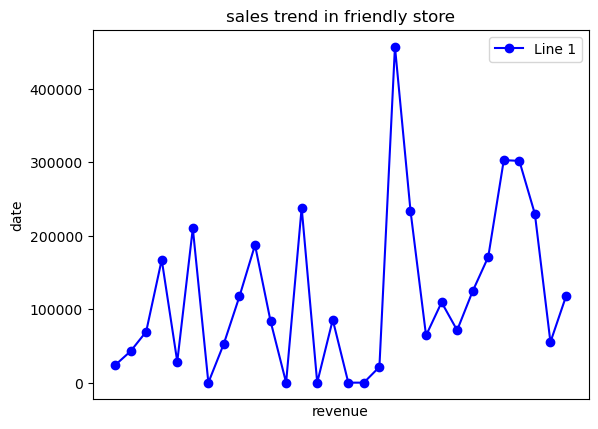

In [161]:
import matplotlib.pyplot as plt
x = sales_df.groupby(pd.Grouper(key='order_date', freq='1D'))['sales'].sum().keys().tolist()
y = sales_df.groupby(pd.Grouper(key='order_date', freq='1D'))['sales'].sum().values.tolist()


# Add title and labels
plt.title("sales trend in friendly store")
plt.xlabel("revenue")
plt.ylabel("date")
plt.xticks(rotation=45)
plt.xticks(ticks=range(len(x)), labels=x, rotation=45)  # Ensure all labels are printed
# Add a legend
plt.plot(x, y, label="Line 1", color='blue', marker='o')

plt.legend()